# Random Forest Classifier

In [1]:
## Importing Libraries
import warnings
warnings.filterwarnings('ignore') #remove warnings


import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
df['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [7]:
df['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [8]:
df['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [9]:
df['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [10]:
df['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

### EDA

<AxesSubplot:>

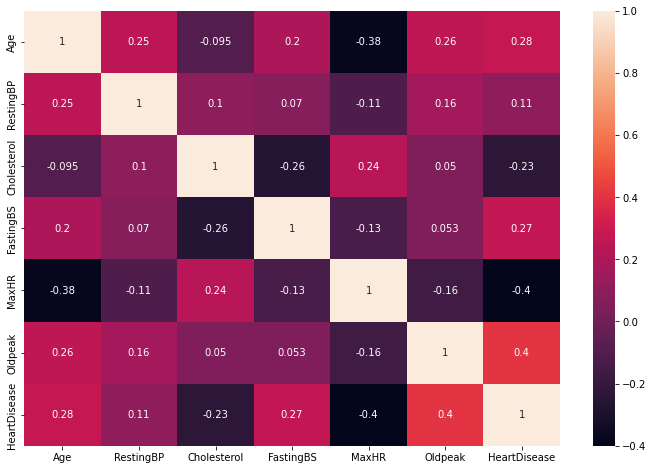

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='ChestPainType'>

<Figure size 864x576 with 0 Axes>

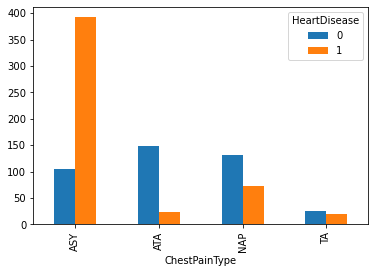

In [12]:
plt.figure(figsize=(12,8))
y = pd.crosstab(df.ChestPainType, df.HeartDisease)

y.plot(kind='bar')

ChestPain 'ASY' has more chances of heart disease.

<AxesSubplot:xlabel='Sex'>

<Figure size 864x576 with 0 Axes>

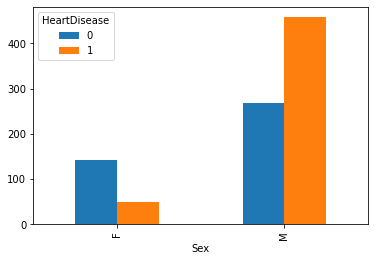

In [13]:
plt.figure(figsize=(12,8))
y = pd.crosstab(df.Sex, df.HeartDisease)

y.plot(kind='bar')

Man has higher chances of heart disease than Women

<AxesSubplot:xlabel='RestingECG'>

<Figure size 864x576 with 0 Axes>

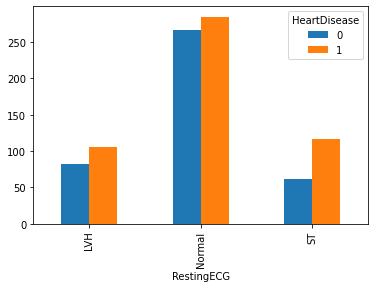

In [14]:
plt.figure(figsize=(12,8))
y = pd.crosstab(df.RestingECG, df.HeartDisease)

y.plot(kind='bar')

<AxesSubplot:xlabel='ST_Slope'>

<Figure size 864x576 with 0 Axes>

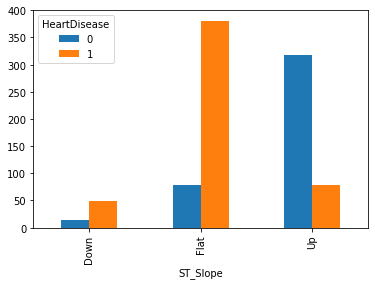

In [15]:
plt.figure(figsize=(12,8))
y = pd.crosstab(df.ST_Slope, df.HeartDisease)

y.plot(kind='bar')

<AxesSubplot:xlabel='ExerciseAngina'>

<Figure size 864x576 with 0 Axes>

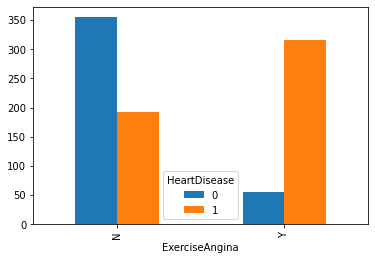

In [16]:
plt.figure(figsize=(12,8))
y = pd.crosstab(df.ExerciseAngina, df.HeartDisease)

y.plot(kind='bar')

<AxesSubplot:xlabel='Sex', ylabel='Age'>

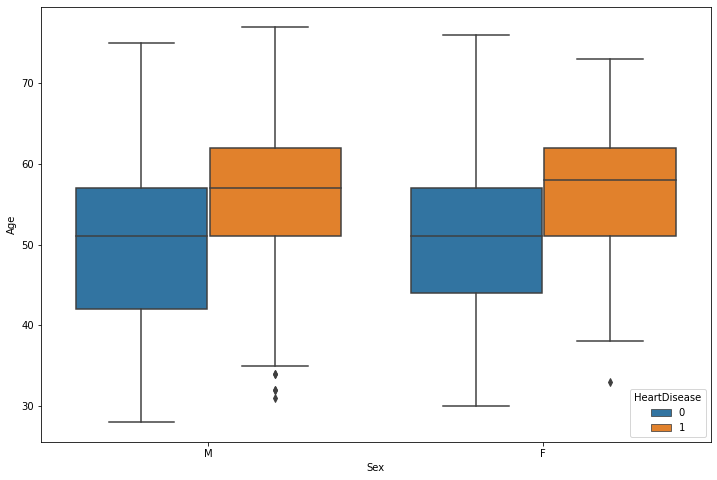

In [17]:
plt.figure(figsize=(12,8))
sns.boxplot(x=df['Sex'],y=df['Age'],hue=df['HeartDisease'])

<AxesSubplot:xlabel='HeartDisease', ylabel='Age'>

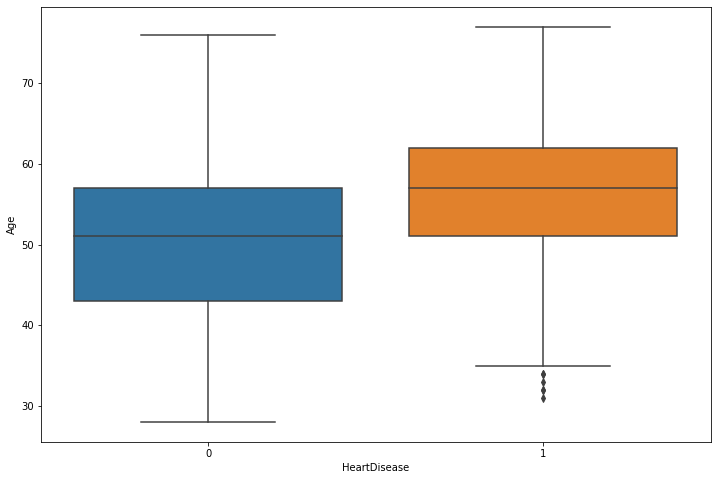

In [18]:
plt.figure(figsize=(12,8))
sns.boxplot(y=df['Age'],x=df['HeartDisease'])

<AxesSubplot:xlabel='HeartDisease', ylabel='MaxHR'>

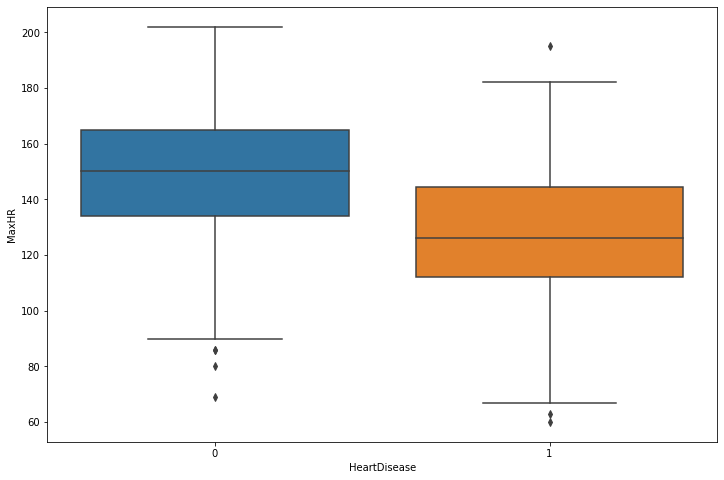

In [19]:
plt.figure(figsize=(12,8))
sns.boxplot(y=df['MaxHR'],x=df['HeartDisease'])

RestingBP,Cholesterol doesnt matter

<AxesSubplot:xlabel='ChestPainType', ylabel='Age'>

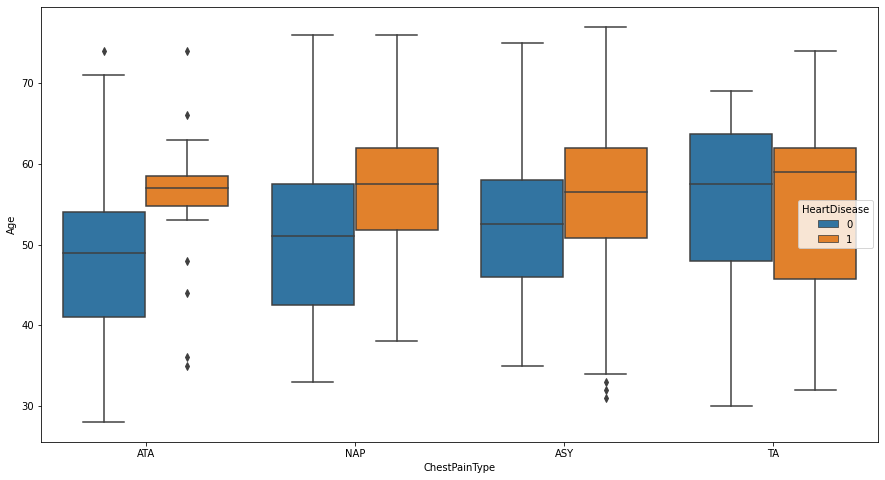

In [20]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df['ChestPainType'],y=df['Age'],hue=df['HeartDisease'])

<AxesSubplot:xlabel='FastingBS', ylabel='Age'>

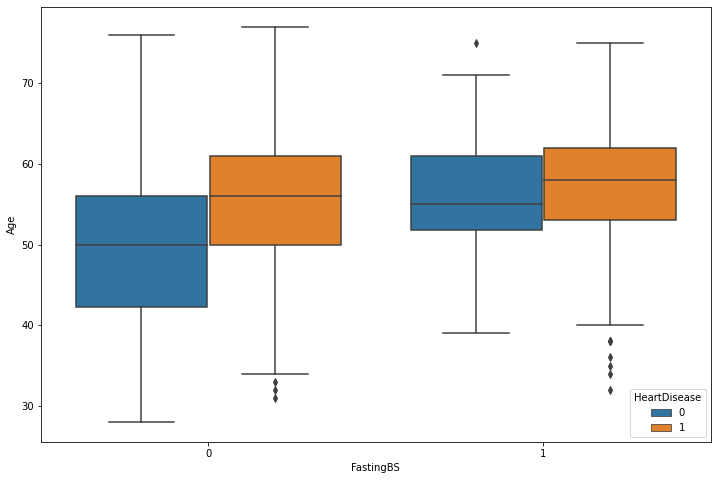

In [21]:
plt.figure(figsize=(12,8))
sns.boxplot(x=df['FastingBS'],y=df['Age'],hue=df['HeartDisease'])

### Random Forest

In [22]:
df['Sex']=pd.factorize(df['Sex'])[0]
df['ChestPainType']=pd.factorize(df['ChestPainType'])[0]
df['RestingECG']=pd.factorize(df['RestingECG'])[0]
df['ExerciseAngina']=pd.factorize(df['ExerciseAngina'])[0]
df['ST_Slope']=pd.factorize(df['ST_Slope'])[0]
df['HeartDisease']=pd.factorize(df['HeartDisease'])[0]

<AxesSubplot:>

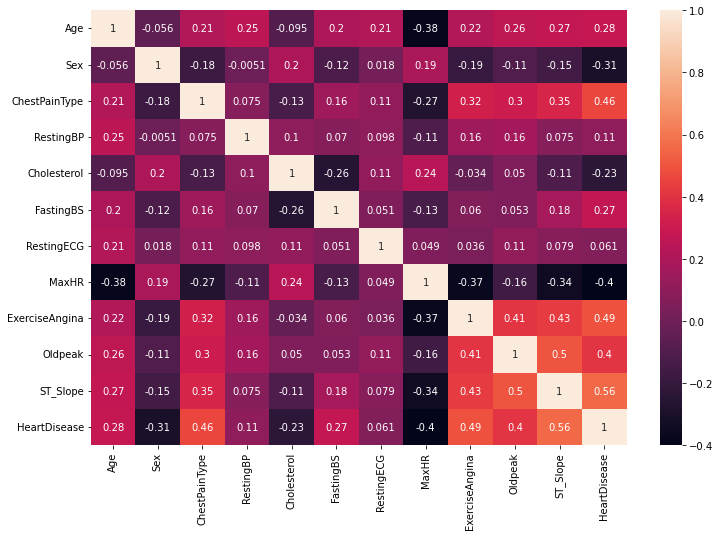

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

In [24]:
#Assigning X and y
X = df.drop('HeartDisease',axis=1)
y = df['HeartDisease']

In [25]:
# now lets split the data into train and test
from sklearn.model_selection import train_test_split
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)
X_train.shape, X_test.shape

((688, 11), (230, 11))

In [26]:
#Using PCA to check feature importance
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([9.22831486e-01, 4.64882469e-02, 2.52186335e-02, 5.22416271e-03,
       9.82295077e-05, 4.70196660e-05, 4.09361466e-05, 1.70828425e-05,
       1.21871992e-05, 1.16334994e-05, 1.03818670e-05])

In [27]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(max_depth=5,n_estimators=100,oob_score=True, random_state=1)

In [28]:
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, oob_score=True, random_state=1)

In [29]:
y_pred = classifier_rf.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score
# Calculate various evaluation metrics
accuracy_score(y_test, y_pred)

0.5260869565217391

In [31]:
# checking the oob score
classifier_rf.oob_score_

0.8488372093023255